In [29]:
import sys
sys.path.append('..')

import numpy as np
import os
import torch
import train_helpers

from dataset import TARGET_LABEL_NAMES

os.environ['CUDA_VISIBLE_DEVICES'] = "6"
os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
state = torch.load('../log/checkpoint.best.pth.tar')

In [31]:
state.keys()

dict_keys(['epoch', 'best_loss', 'best_metrics', 'val_metrics_history', 'train_metrics_history', 'model', 'model_state_dict', 'optimizer', 'optimizer_state_dict'])

<Figure size 576x504 with 0 Axes>

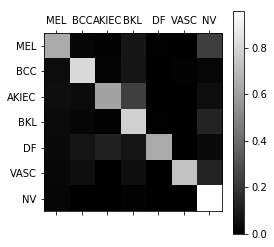

In [32]:
confusion_matrix = state['val_metrics_history'][state['epoch'] - 1]['confusion_matrix']
confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1, keepdims=True)

plt.figure(figsize=(8, 7));
plt.matshow(confusion_matrix, cmap='gray');
plt.xticks(range(len(TARGET_LABEL_NAMES)), TARGET_LABEL_NAMES);
plt.yticks(range(len(TARGET_LABEL_NAMES)), TARGET_LABEL_NAMES);
plt.colorbar();

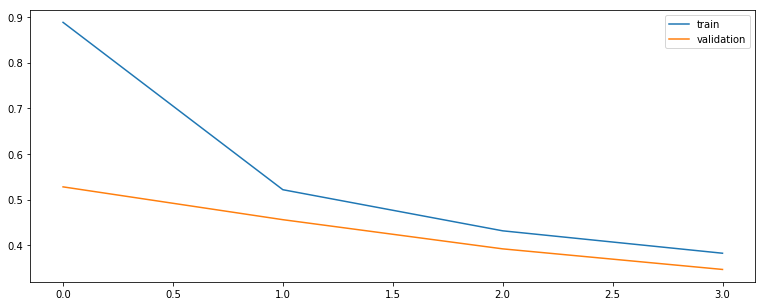

In [33]:
plt.figure(figsize=(13, 5))
plt.plot([metrics['loss'] for metrics in state['train_metrics_history']], label='train')
plt.plot([metrics['loss'] for metrics in state['val_metrics_history']], label='validation')
plt.legend();

In [61]:
cm = state['val_metrics_history'][state['epoch'] - 1]['confusion_matrix']
print(cm)

[[ 134    5    3   18    1    0   49]
 [   5   90    2    9    0    1    3]
 [   4    3   44   17    0    0    4]
 [   9    5    2  162    1    0   28]
 [   1    2    3    2   16    0    1]
 [   1    2    0    2    0   27    5]
 [  31    4    0   16    3    1 1287]]


In [51]:
# Not-weighted accuracy
np.sum(np.diag(cm) / np.sum(cm))

0.8786819770344484

In [36]:
np.sum(cm, axis=1)

array([ 210,  110,   72,  207,   25,   37, 1342])

In [44]:
np.diag(cm) / np.sum(cm, axis=1)

array([0.63809524, 0.81818182, 0.61111111, 0.7826087 , 0.64      ,
       0.72972973, 0.95901639])

In [65]:
# Weighted accuracy
np.mean(np.diag(cm) / np.sum(cm, axis=1))

0.7398204266018134

In [60]:
weights

array([0.04745542, 0.09059671, 0.13841164, 0.04814318, 0.39862552,
       0.26934157, 0.00742596])

In [48]:
# Weighted precision
weights = np.sum(cm, axis=1) / np.sum(cm)
np.sum(np.diag(cm) / np.sum(cm, axis=0) * weights)

0.8767488624795057

In [66]:
# Weighted recall (sensitivity)
weights = np.sum(cm, axis=1) / np.sum(cm)
np.sum(np.diag(cm) / np.sum(cm, axis=1) * weights)

0.8786819770344483